# ESACCI vegetation cover dataset 250206

This script calculate the area of natural grass bare ground, compare them and fit a regression line between change in bare and natural grass area. It shows how these changes compare to between these two ESACCI vegetation cover variable

In [1]:
#IMPORT NEEDED LIBRARIES
import seaborn as sns
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment

In [2]:
pwd

'/Users/jo122/CMIP6/2025/Scripts'

In [3]:
# Load
esa1 = xr.open_dataset('/Users/jo122/CMIP6/2025/ESACCI/ESACCI_PFT_2000_2014reg.nc')

In [4]:
# Rearrange the longitude
esa1['lon'] = (esa1['lon'] - 180) % 360 - 180
esa1 = esa1.sortby('lon')

In [6]:
esa1

<xarray.Dataset> Size: 47MB
Dimensions:   (time: 15, lon: 720, lat: 360)
Coordinates:
  * time      (time) datetime64[ns] 120B 2000-01-01 2001-01-01 ... 2014-01-01
  * lon       (lon) float64 6kB -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * lat       (lat) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Data variables:
    Bare      (time, lat, lon) int8 4MB ...
    Built     (time, lat, lon) int8 4MB ...
    TreesNE   (time, lat, lon) int8 4MB ...
    TreesND   (time, lat, lon) int8 4MB ...
    TreesBE   (time, lat, lon) int8 4MB ...
    TreesBD   (time, lat, lon) int8 4MB ...
    ShrubsNE  (time, lat, lon) int8 4MB ...
    ShrubsND  (time, lat, lon) int8 4MB ...
    ShrubsBE  (time, lat, lon) int8 4MB ...
    ShrubsBD  (time, lat, lon) int8 4MB ...
    GrassNat  (time, lat, lon) int8 4MB ...
    GrassMan  (time, lat, lon) int8 4MB ...
Attributes:
    CDI:                  Climate Data Interface version 2.3.0 (https://mpime...
    Conventions:          CF-1.6
    Description:          ESA CCI PFT fraction between 2000 and 2014
    Author:               Joseph Ovwemuvwose
    Unit:                 Vegetating percentage coverage (%) at 350 by 700
    Source of data:       These values are calculated from the regridding of ...
    Date created:         05/02/2025
    Data Primary source:  https://data.ceda.ac.uk/neodc/esacci/land_cover/dat...
    history:              Thu Feb 06 23:21:16 2025: cdo remapcon,r720x360 ESA...
    CDO:                  Climate Data Operators version 2.3.0 (https://mpime...

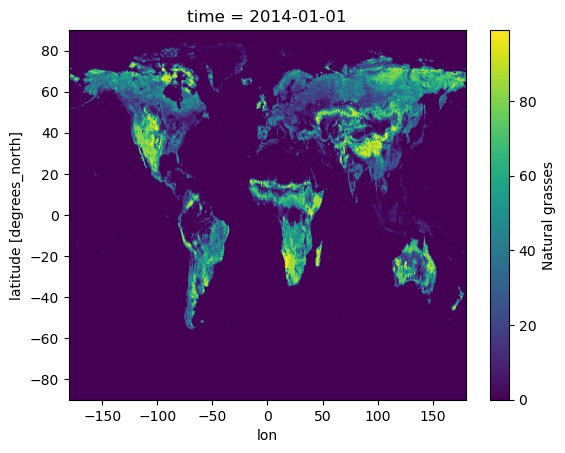

In [5]:
esa1['GrassNat'][-1].plot()

In [8]:
#esa1.attrs["Unit"] = "Vegetating percentage coverage (%) at 360 by 720"
#esa1.attrs["Source of data"]="These values are calculated from the regridding of the ESA CCI land cover at 300 m to 55500 m before regridding to 0.5 by 0.5 using cdo"
#esa1.to_netcdf('/path_to/ESACCI_processed05_2000_2014.nc')

In [6]:
# Loading it with numpy makes it work
grid_area = np.loadtxt('/Users/jo122/pModel/2025/global_area_360720.csv', delimiter = ',')

In [7]:
# Extract bare and natural grass
bare = esa1['Bare']
grassNat = esa1['GrassNat']

# Calculate change in bare and natural grass
bareChange = bare-bare[0]
grassNatChange = grassNat-grassNat[0]


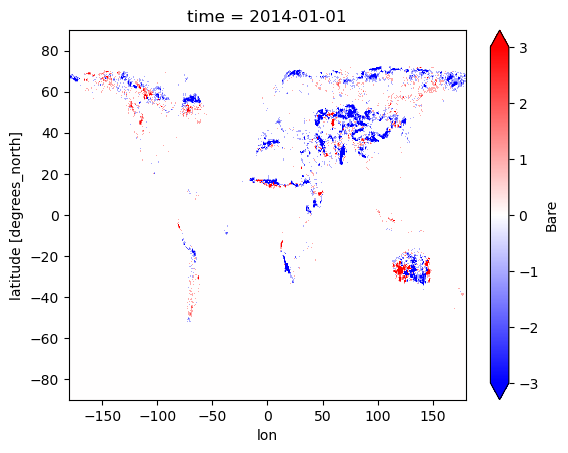

In [9]:
bareChange[-1].plot(cmap = 'bwr', vmin = -3, vmax = 3)

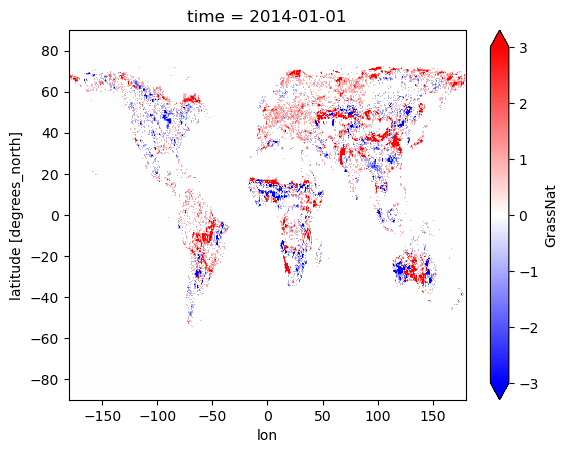

In [11]:
grassNatChange[-1].plot(cmap = 'bwr', vmin = -3, vmax = 3)

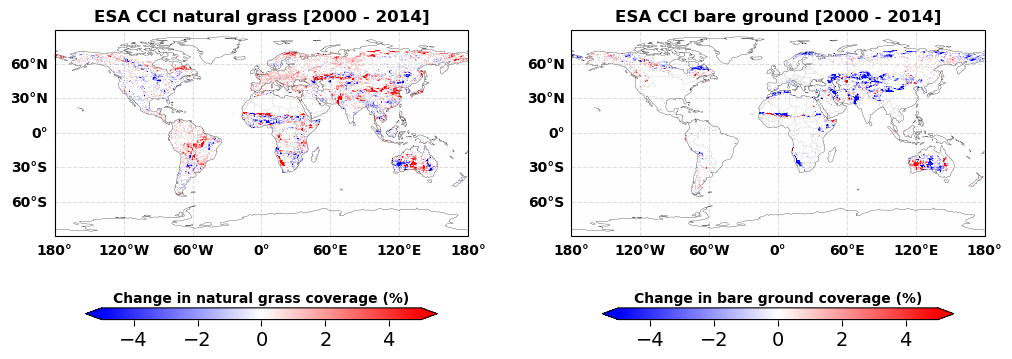

In [14]:
# Make the plot for the change crop coverage between 1970 and 2014


# Define your data plots
change_plot = [grassNatChange[-1], bareChange[-1]]


# Defining the columns, rows, and plot size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), 
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Flattening the 2D array of axes for easy iteration
axes = axes.flatten()

vmin = -5 
vmax = 5  


# Plotting the figures with borders and coastlines
for i, ax in enumerate(axes):
    change_plot[i].plot(ax=ax, cmap='bwr', robust = False, 
                        cbar_kwargs={'shrink': 0.85, 'orientation': 'horizontal',
                                     'aspect': 30, 'pad': 0.155}, vmin=vmin, vmax=vmax)
    
    # Add borders and coastlines
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.05)
    ax.coastlines(linewidth=0.2)
    gl = ax.gridlines(linestyle='--', color='black', 
                      alpha=0.125, draw_labels=True) 
    gl.top_labels = False  
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'weight': 'bold'}
    gl.ylabel_style = {'size': 10, 'weight': 'bold'}
    
    # Set the geographical extent to cover the whole globe
    ax.set_extent([-180, 180, -90, 90])  
    
    # Add title based on the model names with increased font weight
    #ax.set_title(plot_names[i], fontsize=18, 
                 #fontweight='bold')  
    
    # Remove x and y axes labels and x and y tick labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add y-axis labels to the first and fourth subplots with padding

axes[0].set_title('ESA CCI natural grass [2000 - 2014]', fontsize=12, fontweight='bold')
axes[1].set_title('ESA CCI bare ground [2000 - 2014]', fontsize=12, fontweight='bold')
#axes[4].set_title('')



for i, ax in enumerate(axes):
    cbar = ax.collections[0].colorbar
    
    # Set the label based on the index
    if i < 1:  # For axes[0]
        cbar.set_label('Change in natural grass coverage (%)', fontsize=10, fontweight='bold')
    else:  # For axes[1] 
        cbar.set_label('Change in bare ground coverage (%)', fontsize=10, fontweight='bold')
    
    # Common properties for all color bars
    cbar.ax.tick_params(labelsize=14, size=4)
    cbar.ax.xaxis.set_label_position('top')

# Remove color bar from each subplot
#for ax in axes:
    #cbar = ax.collections[0].colorbar
    #cbar.remove()    

# Adjusting the layout to reduce the gap
plt.subplots_adjust(hspace=0.25, wspace=0.25)

#Save the plot
# Save the plot
#plt.savefig('path_to/bareGassNat_ChangeMap_2000_2014.png', dpi=500, 
            #bbox_inches='tight', pad_inches=0.1)

# Display the plot
plt.show()

In [20]:
(grid_area.sum())//10e11

np.float64(510.0)

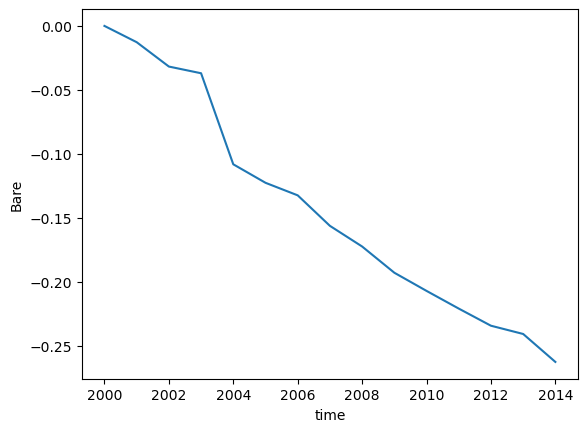

In [25]:
# Area change
bareArea = (bareChange * grid_area)/100
bareArea_change = (bareArea.sum(('lat', 'lon')))/10e11
bareArea_change.plot()

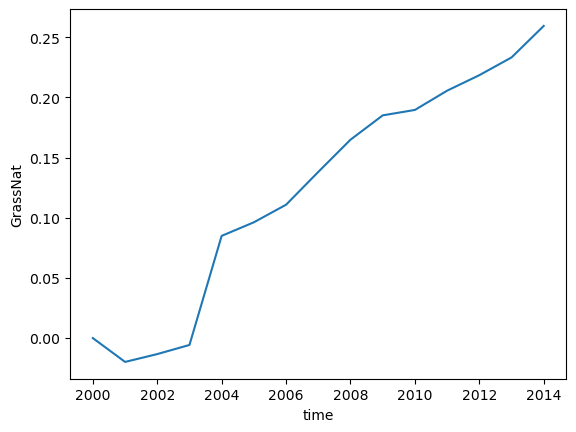

In [24]:
# Area change
grassnatArea = (grassNatChange*  grid_area)/100
grassnatArea_change = (grassnatArea.sum(('lat', 'lon')))/10e11
grassnatArea_change.plot()

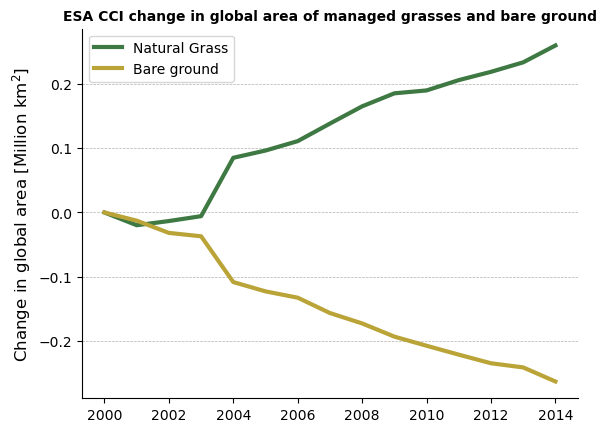

In [26]:
grassnatArea_change.plot(label = 'Natural Grass', lw = 3, c = '#3e7842')
bareArea_change.plot(label = 'Bare ground', lw = 3, c = '#baa438')
plt.ylabel('Change in global area [Million km$^2$]', size=12)
plt.xlabel('')
plt.title('ESA CCI change in global area of managed grasses and bare ground',
          size=10, weight = 'bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

# Save the plot
#plt.savefig('/path_to/bareGassNat_Change.png', dpi=500, 
            #bbox_inches='tight', pad_inches=0.1)


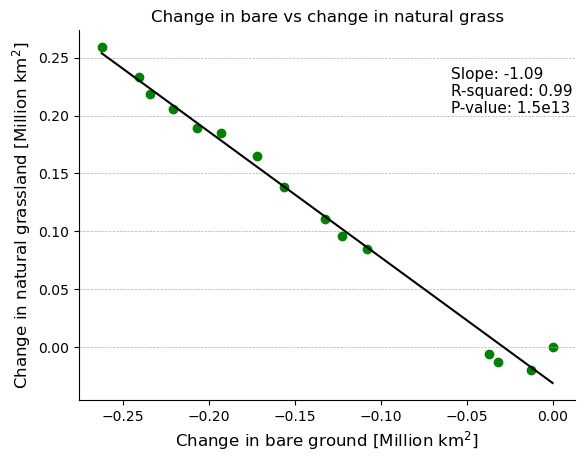

In [37]:
# Simple regression between bare ground and natueral grass
from scipy.stats import linregress

x = np.array(bareArea_change)
y = np.array(grassnatArea_change)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate R-squared
r_squared = r_value**2

# Create points for the regression line
x_line = np.array([min(x), max(x)])
y_line = slope * x_line + intercept

# Plot the data and the regression line
plt.scatter(x, y, label='Data', c='green')
plt.plot(x_line, y_line, color='black', label='Regression Line')

# Add labels and title
plt.xlabel('Change in bare ground [Million km$^2$]', fontsize = 12)
plt.ylabel('Change in natural grassland [Million km$^2$]', fontsize = 12)
plt.title('Change in bare vs change in natural grass', fontsize = 12)

# Create the text for the annotation
annotation_text = (
    f"Slope: {slope:.2f}\n"  # Format slope to 2 decimal places
    f"R-squared: {r_squared:.2f}\n"  # Format R-squared to 2 decimal places
    f"P-value: 1.5e13"  # Format p-value to 3 decimal places
)

# Add the annotation to the plot
plt.annotate(
    annotation_text,
    xy=(0.75, 0.775),  # Adjust position as needed (x, y as fractions of axes)
    xycoords='axes fraction',  # Use axes coordinates
    fontsize=11  # Adjust font size as needed
)

plt.grid(axis='y', linestyle='--', linewidth=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('/path_to/ESACCI_change_bare_grassNat_2000_2014.png', dpi=500, bbox_inches='tight', pad_inches=0.1)

# Add legend
#plt.legend()
plt.show()